#Bank Customer Satisfaction Prediction Using CNN and Feature Selection

### Installation of TensorFlow & GPU

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install tensorflow-gpu



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing Modules and Libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.11.0


### Downloading dataset from Github

In [10]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17
Unpacking objects: 100% (17/17), 7.24 MiB | 2.86 MiB/s, done.
Encountered 2 file(s) that should have been pointers, but weren't:
	santander-test.csv
	santander-train.csv


### Reading Data using Pandas Dataframe

In [13]:
data=pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-train.csv')
data.shape

(76020, 371)

In [14]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


###Dropping customer ID & Target column

In [15]:
X = data.drop(labels=['ID', 'TARGET'], axis = 1)
X.shape

(76020, 369)

In [16]:
y = data['TARGET'] # it will contain only target column

### Splitting Dataset into TrainTest

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((60816, 369), (15204, 369))

### Removing Duplicate Feature, Constant & Quasi Constant

In [18]:
filter = VarianceThreshold(0.01)
X_train = filter.fit_transform(X_train)
X_test = filter.transform(X_test)

X_train.shape, X_test.shape

((60816, 273), (15204, 273))

In [19]:
#Removing Duplicate feature
X_train_T = X_train.T
X_test_T = X_test.T

X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

X_train_T.shape

(273, 60816)

In [20]:
#.duplicated() returns a boolean Series denoting duplicate row
X_train_T.duplicated().sum()

17

In [22]:
duplicated_features = X_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [23]:
#False values are unique feature
# Changing false->True and True->False
features_to_keep = [not index for index in duplicated_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [24]:
X_train = X_train_T[features_to_keep].T
X_train.shape

(60816, 256)

In [25]:
X_test = X_test_T[features_to_keep].T
X_test.shape

(15204, 256)

In [26]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000


### Data Normalization

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 3.80478472e-02, -5.56029626e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -1.83006062e-01],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  1.17499225e+00],
       ...,
       [ 3.80478472e-02,  5.99731758e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -2.41865113e-01],
       [ 3.80478472e-02, -1.70775831e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02,  2.91528722e-01,  7.65192053e+00, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03]])

In [28]:
X_train.shape, X_test.shape

((60816, 256), (15204, 256))

In [29]:
# Reshaping dataset into 3D
X_train = X_train.reshape(60816, 256,1)
X_test = X_test.reshape(15204, 256, 1)
X_train.shape, X_test.shape

((60816, 256, 1), (15204, 256, 1))

In [30]:
#converting series to numpy array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Building CNN

In [31]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape = (256,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 254, 32)           128       
                                                                 
 batch_normalization (BatchN  (None, 254, 32)          128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 127, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 64)           6208      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 64)          2

In [33]:
#Compile Model with Adam Optimizer with learning rate=0.00005
#We will use binary cross entropy-discreate data
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
1901/1901 [==============================] - 115s 59ms/step - loss: 0.1956 - accuracy: 0.9593 - val_loss: 0.1650 - val_accuracy: 0.9604
Epoch 2/10
1901/1901 [==============================] - 120s 63ms/step - loss: 0.1626 - accuracy: 0.9603 - val_loss: 0.1543 - val_accuracy: 0.9604
Epoch 3/10
1901/1901 [==============================] - 105s 55ms/step - loss: 0.1573 - accuracy: 0.9603 - val_loss: 0.1601 - val_accuracy: 0.9604
Epoch 4/10
1901/1901 [==============================] - 105s 55ms/step - loss: 0.1567 - accuracy: 0.9603 - val_loss: 0.1501 - val_accuracy: 0.9604
Epoch 5/10
1901/1901 [==============================] - 104s 54ms/step - loss: 0.1532 - accuracy: 0.9602 - val_loss: 0.1516 - val_accuracy: 0.9597
Epoch 6/10
1901/1901 [==============================] - 104s 55ms/step - loss: 0.1499 - accuracy: 0.9604 - val_loss: 0.1460 - val_accuracy: 0.9604
Epoch 7/10
1901/1901 [==============================] - 103s 54ms/step - loss: 0.1491 - accuracy: 0.9604 - val_loss: 0

In [34]:
history.history

{'loss': [0.19564016163349152,
  0.16258400678634644,
  0.15728308260440826,
  0.15670248866081238,
  0.1532255858182907,
  0.14993102848529816,
  0.14906412363052368,
  0.14870046079158783,
  0.1464676409959793,
  0.14683328568935394],
 'accuracy': [0.9592705965042114,
  0.960322916507721,
  0.960322916507721,
  0.9602900743484497,
  0.9602407217025757,
  0.960355818271637,
  0.960388720035553,
  0.960421621799469,
  0.960405170917511,
  0.960421621799469],
 'val_loss': [0.1650339663028717,
  0.15426261723041534,
  0.16013556718826294,
  0.15011988580226898,
  0.15159504115581512,
  0.14600886404514313,
  0.14640724658966064,
  0.14666534960269928,
  0.1472163051366806,
  0.14501556754112244],
 'val_accuracy': [0.960405170917511,
  0.960405170917511,
  0.960405170917511,
  0.960405170917511,
  0.9596816897392273,
  0.960405170917511,
  0.960339367389679,
  0.960405170917511,
  0.960405170917511,
  0.9602736234664917]}

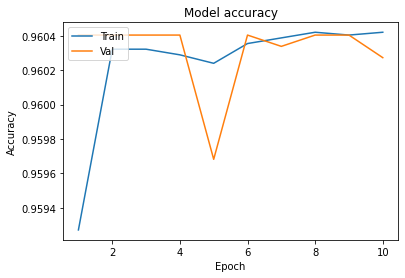

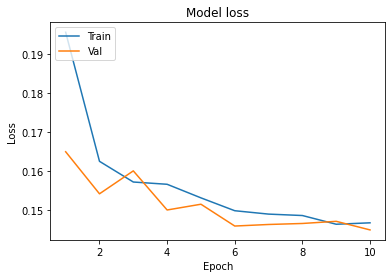

In [35]:
#function for plotting learning Curve
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 10)